### Load libraries

In [1]:
import numpy as np
import cv2 as cv
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib. pyplot as plt

### BoW Model

In [10]:
class Dictionary(object):
    def __init__(self, name, img_filenames):
        self.name = name # name of your dictionary
        self.img_filenames = img_filenames # list of image filenames
        # self.num_words = num_words # the number of words
        self.training_data = [] # this is the training data required by the K-Means algorithm
        self.words = [] # list of words, which are the centroids of clusters
        
    def elbow(self):
        sift = cv.xfeatures2d.SIFT_create()

        num_keypoints = [] # this is used to store the number of keypoints in each image
        training_data = []

        # load training images and compute SIFT descriptors
        for filename in self.img_filenames:
            img = cv.imread(filename)
            img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
            list_des = sift.detectAndCompute(img_gray, None)[1]
            if list_des is None:
                num_keypoints.append(0)
            else:
                num_keypoints.append(len(list_des))
                for des in list_des:
                    training_data.append(des)
                    
        Sum_of_squared_distances = []
        # K = [30, 40, 50, 60, 70, 80, 90, 100, 110, 125, 135, 150, 160, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450, 475, 500]
        # K = [50, 75, 100, 110, 125, 135, 150, 160, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450, 475, 500]
        K = [50, 75, 100, 110, 125, 135, 150, 160, 175, 190, 200, 210, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450, 475, 500]
        for k in K:
            km = KMeans(n_clusters=k)
            km = km.fit(training_data)
            Sum_of_squared_distances.append(km.inertia_)

        plt.plot(K, Sum_of_squared_distances, 'bx-')
        plt.xlabel('k')
        plt.ylabel('Sum of squared distances')
        plt.title('Elbow Method For Optimal k')
        plt.show()

    def learn(self, num_words):
        sift = cv.xfeatures2d.SIFT_create()

        num_keypoints = [] # this is used to store the number of keypoints in each image

        # load training images and compute SIFT descriptors
        for filename in self.img_filenames:
            img = cv.imread(filename)
            img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
            list_des = sift.detectAndCompute(img_gray, None)[1]
            if list_des is None:
                num_keypoints.append(0)
            else:
                num_keypoints.append(len(list_des))
                for des in list_des:
                    self.training_data.append(des)

        # cluster SIFT descriptors using K-means algorithm
        kmeans = KMeans(num_words)
        kmeans.fit(self.training_data)
        self.words = kmeans.cluster_centers_

        # create word histograms for training images
        training_word_histograms = [] #list of word histograms of all training images
        index = 0
        for i in range(0, len(self.img_filenames)):
            # for each file, create a histogram
            histogram = np.zeros(num_words, np.float32)
            # if some keypoints exist
            if num_keypoints[i] > 0:
                for j in range(0, num_keypoints[i]):
                    histogram[kmeans.labels_[j + index]] += 1
                index += num_keypoints[i]
                histogram /= num_keypoints[i]
                training_word_histograms.append(histogram)

        return training_word_histograms

    def create_word_histograms(self, img_filenames, num_words):
        sift = cv.xfeatures2d.SIFT_create()
        histograms = []

        for filename in img_filenames:
            img = cv.imread(filename)
            img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
            descriptors = sift.detectAndCompute(img_gray, None)[1]
            histogram = np.zeros(num_words, np.float32) # word histogram for the input image

            if descriptors is not None:
                for des in descriptors:
                    # find the best matching word
                    min_distance = 1111111 # this can be any large number
                    matching_word_ID = -1 # initial matching_word_ID=-1 means no matching

                    for i in range(0, num_words): #search for the best matching word
                        distance = np.linalg.norm(des - self.words[i])
                        if distance < min_distance:
                            min_distance = distance
                            matching_word_ID = i
                    histogram[matching_word_ID] += 1
                histogram /= len(descriptors) #normalise histogram to frequencies
            histograms.append(histogram)
        return histograms

### Loading Data 

In [3]:
import os

tools = ['hammer', 'pliers', 'screw_driver', 'wrench']
path = 'ToolImages/'

def get_data(dir_name):
    file_names = []
    tool_labels = []
    for i in range(0, len(tools)):
        sub_path = path + dir_name + '/' + tools[i] + '/'
        sub_file_names = [os.path.join(sub_path, f) for f in os.listdir(sub_path)]
        sub_tool_labels = [i] * len(sub_file_names) #create a list of N elements, all are i
        file_names += sub_file_names
        tool_labels += sub_tool_labels
    return (file_names, tool_labels)

In [4]:
training_data = get_data('Train')
training_file_names = training_data[0]
training_tool_labels = training_data[1]

In [5]:
print(training_file_names)

['ToolImages/Train/hammer/000002.jpg', 'ToolImages/Train/hammer/000013.jpg', 'ToolImages/Train/hammer/000014.jpg', 'ToolImages/Train/hammer/000015.jpg', 'ToolImages/Train/hammer/000016.jpg', 'ToolImages/Train/hammer/000017.jpg', 'ToolImages/Train/hammer/000018.jpg', 'ToolImages/Train/hammer/000020.jpg', 'ToolImages/Train/hammer/000022.jpg', 'ToolImages/Train/hammer/000037.jpg', 'ToolImages/Train/hammer/000042.jpg', 'ToolImages/Train/hammer/000046.jpg', 'ToolImages/Train/hammer/000047.jpg', 'ToolImages/Train/hammer/000048.jpg', 'ToolImages/Train/hammer/000049.jpg', 'ToolImages/Train/hammer/000052.jpg', 'ToolImages/Train/hammer/000053.jpg', 'ToolImages/Train/hammer/000061.jpg', 'ToolImages/Train/hammer/000063.jpg', 'ToolImages/Train/hammer/000069.jpg', 'ToolImages/Train/hammer/000070.jpg', 'ToolImages/Train/hammer/000071.jpg', 'ToolImages/Train/hammer/000072.jpg', 'ToolImages/Train/hammer/000074.jpg', 'ToolImages/Train/hammer/000075.jpg', 'ToolImages/Train/hammer/000083.jpg', 'ToolImages

In [6]:
testing_data = get_data('Test')
test_file_names = testing_data[0]
test_tool_labels = testing_data[1]

In [7]:
print(test_file_names)

['ToolImages/Test/hammer/0000273.jpg', 'ToolImages/Test/hammer/000117.jpg', 'ToolImages/Test/hammer/000118.jpg', 'ToolImages/Test/hammer/000120.jpg', 'ToolImages/Test/hammer/000121.jpg', 'ToolImages/Test/hammer/000122.jpg', 'ToolImages/Test/hammer/000126.jpg', 'ToolImages/Test/hammer/000127.jpg', 'ToolImages/Test/hammer/000129.jpg', 'ToolImages/Test/hammer/000134.jpg', 'ToolImages/Test/hammer/000135.jpg', 'ToolImages/Test/hammer/000153.jpg', 'ToolImages/Test/hammer/000154.jpg', 'ToolImages/Test/hammer/000155.jpg', 'ToolImages/Test/hammer/000167.jpg', 'ToolImages/Test/hammer/000169.jpg', 'ToolImages/Test/hammer/000170.jpg', 'ToolImages/Test/hammer/000176.jpg', 'ToolImages/Test/hammer/000177.jpg', 'ToolImages/Test/hammer/000187.jpg', 'ToolImages/Test/hammer/000192.jpg', 'ToolImages/Test/hammer/000203.jpg', 'ToolImages/Test/hammer/000205.jpg', 'ToolImages/Test/hammer/000208.jpg', 'ToolImages/Test/hammer/000209.jpg', 'ToolImages/Test/hammer/000211.jpg', 'ToolImages/Test/hammer/000214.jpg',

In [11]:
dictionary_name = 'tool'
dictionary = Dictionary(dictionary_name, training_file_names)

### Elbow Method
using K = [50, 75, 100, 110, 125, 135, 150, 160, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450, 475, 500]

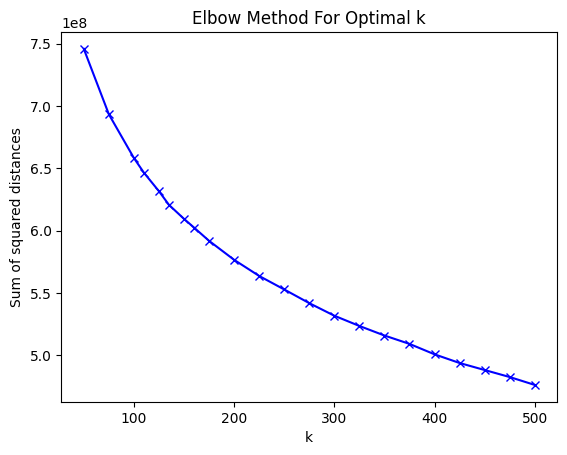

In [9]:
dictionary.elbow()

### Elbow Method
using K = [50, 75, 100, 110, 125, 135, 150, 160, 175, 190, 200, 210, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450, 475, 500]

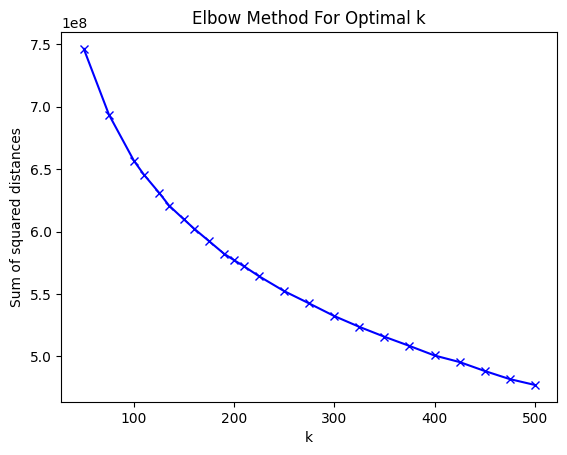

In [12]:
dictionary.elbow()